<a href="https://colab.research.google.com/github/Naisha31/Credit-Card-Approval-Prediction-Model/blob/main/ML_Project_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD APPROVAL PREDICTION

**We have used multiple classification technqiues along with a final ensemble model having accuracy of 84.78%**

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

## Loading Dataset

In [ ]:
credit = pd.read_csv('/content/creditcard_approval.csv')

## Exploring the dataset

In [ ]:
credit.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
credit.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
credit.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [ ]:
credit.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [ ]:
credit.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

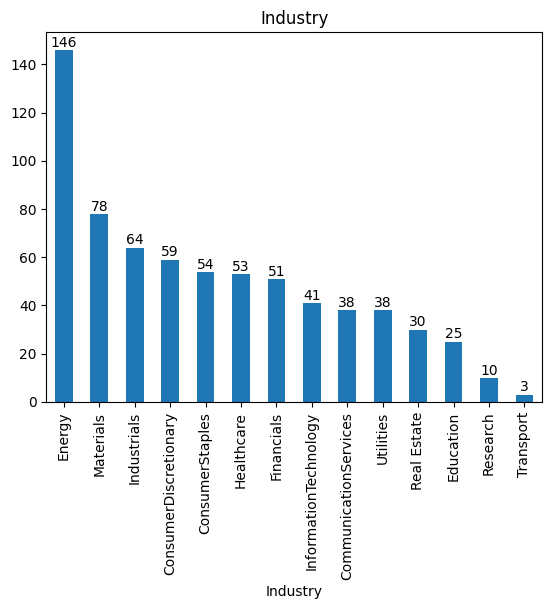

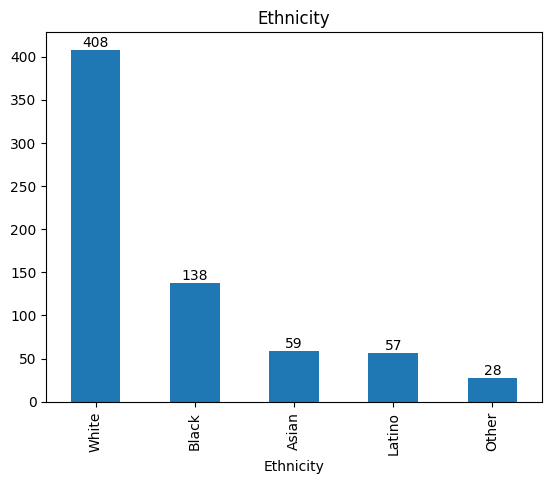

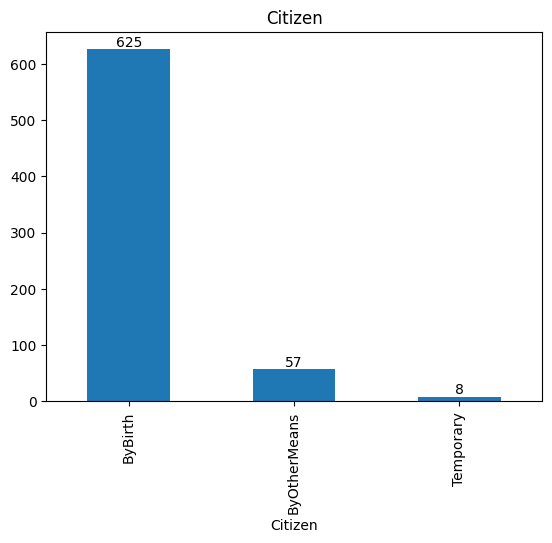

In [ ]:
# display all columns have a datatype "object"
def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(credit)

## Data Pre-processing

In [ ]:
credit['Industry'].replace(['Energy', 'Materials','Industrials','ConsumerDiscretionary','ConsumerStaples','Healthcare','Financials', 'InformationTechnology','CommunicationServices','Utilities','Real Estate','Education','Research','Transport'],
                        [0, 1,2,3,4,5,6,7,8,8,8,8,8,8], inplace=True)

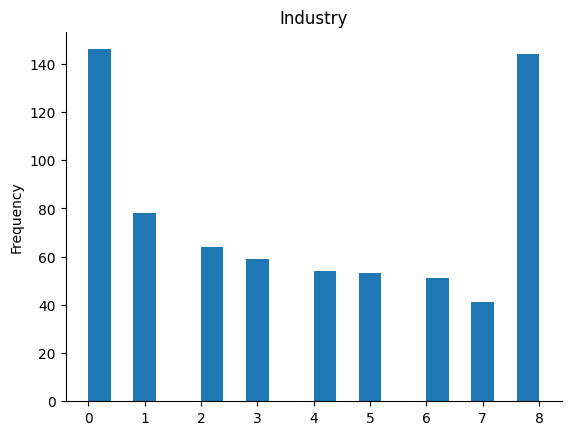

In [ ]:
from matplotlib import pyplot as plt
credit['Industry'].plot(kind='hist', bins=20, title='Industry')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
le = LabelEncoder()
# Convert the non-numeric data into numeric--------
# Iterate over all the values of each column and extract their dtypes
for col in credit.columns:
    # Compare if the dtype is object
    if credit[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        credit[col]=le.fit_transform(credit[col])

print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB
None


In [ ]:
credit

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,2,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,1,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,1,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,2,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,2,4,1.71,1,0,0,0,1,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,8,1,1.25,0,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,0,4,2.00,0,1,2,1,0,200,394,0
687,0,25.25,13.500,0,0,5,2,2.00,0,1,1,1,0,200,1,0
688,1,17.92,0.205,1,1,4,4,0.04,0,0,0,0,0,280,750,0


In [ ]:
credit.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry            9
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [ ]:
X = credit.iloc[:, :-1]
y = credit.iloc[:, -1]

In [ ]:
X=X.drop('ZipCode',axis=1)

In [ ]:
print(X.head())

   Gender    Age   Debt  Married  BankCustomer  Industry  Ethnicity  \
0       1  30.83  0.000        1             1         2          4   
1       0  58.67  4.460        1             1         1          1   
2       0  24.50  0.500        1             1         1          1   
3       1  27.83  1.540        1             1         2          4   
4       1  20.17  5.625        1             1         2          4   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

   Citizen  Income  
0        0       0  
1        0     560  
2        0     824  
3        0       3  
4        1       0  


In [ ]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: Approved, dtype: int64


## Train Test Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_entropy.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of test dataset Decision Tree classifier:", accuracy_dt)

Accuracy of test dataset Decision Tree classifier: 0.7028985507246377


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# 2. Gradient Boosting

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of test dataset gradient boosting classifier:", accuracy_gb)

Accuracy of test dataset gradient boosting classifier: 0.8115942028985508


## 3. Logistic Regression

In [ ]:
# Fit a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)
y_train_pred = logreg.predict(X_train_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

accuracy_test_lr = accuracy_score(y_test, y_pred)
conf_matrix_test = confusion_matrix(y_test, y_pred)

print("Accuracy of test dataset logistic regression classifier:", accuracy_test_lr)

print("Confusion Matrix:")
print(conf_matrix_test)

Accuracy of test dataset logistic regression classifier: 0.8260869565217391
Confusion Matrix:
[[53 15]
 [ 9 61]]


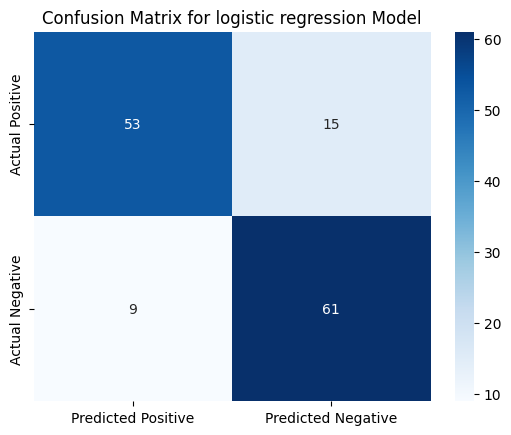

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your confusion matrix
conf_matrix = conf_matrix

# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()

## 4. Random Forest

In [ ]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42)

random_f.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_f.predict(X_test_scaled)

print("Accuracy of test dataset Random forest classifier:",random_f.score(X_test_scaled,y_test))

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Accuracy of test dataset Random forest classifier: 0.8405797101449275
Confusion Matrix for Random Forest:
[[60  8]
 [14 56]]


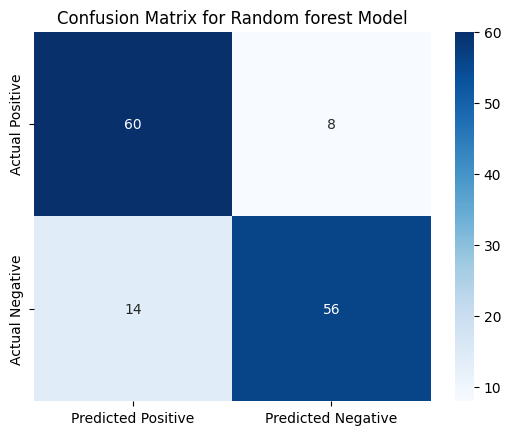

In [ ]:
# Your confusion matrix
conf_matrix = conf_matrix_rf

conf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()

5. SVM

In [ ]:
from sklearn.svm import SVC  # Import SVC from sklearn.svm module

# Initialize and train the Support Vector Classifier (SVC)
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42)  # You can adjust parameters like kernel and C value as needed
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of test dataset SVM classifier:", accuracy_svm)



Accuracy of test dataset SVM classifier: 0.8188405797101449


# Table comparing all models

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
import pandas as pd

# Calculate metrics for each model
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1_score = fbeta_score(y_test, y_pred, beta=1)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1_score = fbeta_score(y_test, y_pred_rf, beta=1)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1_score = fbeta_score(y_test, y_pred_gb, beta=1)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1_score = fbeta_score(y_test, y_pred_dt, beta=1)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1_score = fbeta_score(y_test, y_pred_svm, beta=1)

# Create a DataFrame to store the results
data = {  'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'DecisionTree': [dt_accuracy, dt_precision, dt_recall, dt_f1_score],
     'GradientBoosting': [gb_accuracy, gb_precision, gb_recall, gb_f1_score],
   'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1_score],
      'LogisticRegression': [lr_accuracy, lr_precision, lr_recall, lr_f1_score],
    'RandomForest': [rf_accuracy, rf_precision, rf_recall, rf_f1_score]

}

print(metrics_df.to_string(index=False))



   Metric  DecisionTree  GradientBoosting      SVM  LogisticRegression  RandomForest
 Accuracy      0.702899          0.811594 0.818841            0.826087      0.840580
Precision      0.643564          0.833333 0.800000            0.802632      0.875000
   Recall      0.928571          0.785714 0.857143            0.871429      0.800000
 F1-Score      0.760234          0.808824 0.827586            0.835616      0.835821


In [ ]:
new_tuple = [[1,36,3.56,0,1,7,0,2,0,1,8,1,0,888]]

# Make predictions on the new tuple
predicted_class = random_f.predict(new_tuple)

# Display the predicted class
print("Predicted class for the new tuple:", predicted_class)

Predicted class for the new tuple: [1]


In [ ]:
new_tuple2 = [[1,25,120,1,1,0,0,0.25,1,0,0,1,1,0]]

# Make predictions on the new tuple
predicted_class = random_f.predict(new_tuple2)

# Display the predicted class
print("Predicted class for the new tuple:", predicted_class)

Predicted class for the new tuple: [0]


Top 5 features: ['PriorDefault', 'YearsEmployed', 'Income', 'CreditScore', 'Debt']


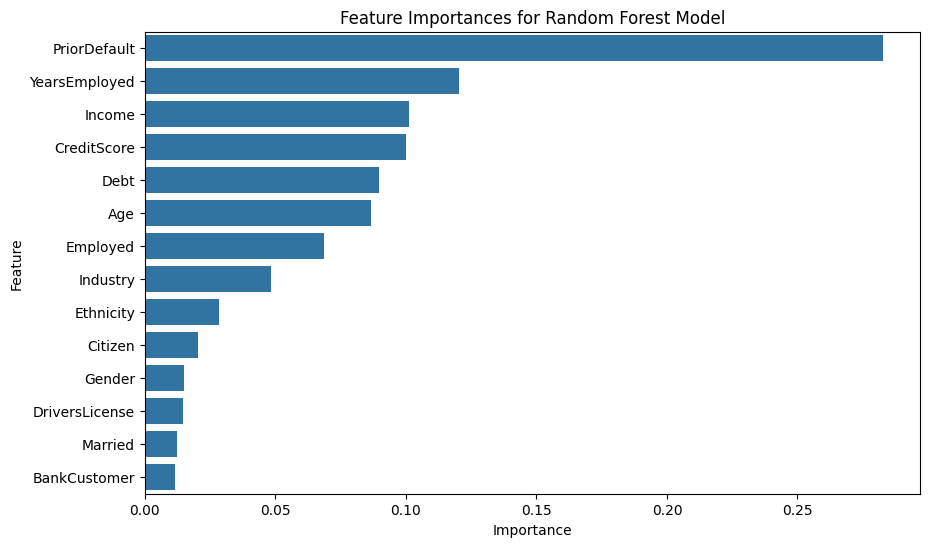

In [ ]:

importances = random_f.feature_importances_
features = X.columns

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the top 5 most important features
print(f"Top 5 features: {list(feature_importances_df['Feature'])[:5]}")

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances for Random Forest Model')
plt.show()


FUTURE SCOPE

Title: Credit Card Approval Prediction using Classification Algorithms, 2022

Publisher:  International Journal for Research in Applied Science and Engineering Technology (IJRASET)
Publication Name:  International Journal for Research in Applied Science and Engineering Technology


To further improve our system, we can use deep learning models as it can increase our accuracy. Neural networks can be used as it
can discover hidden patterns and correlations in raw data, cluster and classify it, and continuously learn and improve over time. In
the future, this credit card approval system will be able to be optimized and implemented in an artificial intelligence environment.
By displaying the prediction result on a web or desktop application, the system can also be automated. Thus, this work has a good
future scope and can be enhanced by adding other various feature for better predictions.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_sequential, accuracy_sequential = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss_sequential}')
print("Accuracy of test dataset gradient boosting classifier:", accuracy_sequential)

Epoch 1/10
14/14 [==============================] - 1s 20ms/step - loss: 0.6891 - accuracy: 0.5941 - val_loss: 0.6608 - val_accuracy: 0.6757
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.7438 - val_loss: 0.6010 - val_accuracy: 0.8468
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5802 - accuracy: 0.8163 - val_loss: 0.5425 - val_accuracy: 0.8739
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.8322 - val_loss: 0.4813 - val_accuracy: 0.8739
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8503 - val_loss: 0.4269 - val_accuracy: 0.8829
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4041 - accuracy: 0.8617 - val_loss: 0.3935 - val_accuracy: 0.8829
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3725 - accuracy: 0.8707 - val_loss: 0.3788 - val_accuracy: 0.8739
Epoch 8/10
14/14 [=

Neural Network Model Definition: This section defines the architecture of the neural network model using Sequential() from keras.models.

Dense() layers define fully connected layers in the neural network.

The first layer (Dense(64, activation='relu', input_dim=X_train.shape[1])) has 64 neurons, uses the ReLU activation function, and specifies the input dimension based on the number of features in the training data.

The second layer (Dense(32, activation='relu')) has 32 neurons and uses the ReLU activation function.

The output layer (Dense(1, activation='sigmoid')) has 1 neuron (as it's a binary classification task), and the sigmoid activation function is used to obtain probabilities of the positive class.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Perform feature engineering if possible

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers for each algorithm with hyperparameter tuning
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
lr_clf = LogisticRegression(C=0.1, random_state=42)

# Hyperparameter tuning for MLPClassifier
param_grid_nn = {'hidden_layer_sizes': [(100, 50), (128, 64)], 'alpha': [0.0001, 0.001]}
grid_search_nn = GridSearchCV(nn_clf, param_grid_nn, cv=3)
grid_search_nn.fit(X_train_scaled, y_train)
best_nn_clf = grid_search_nn.best_estimator_

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {'n_estimators': [200, 300], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf_clf = grid_search_rf.best_estimator_

# Hyperparameter tuning for LogisticRegression
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_search_lr = GridSearchCV(lr_clf, param_grid_lr, cv=3)
grid_search_lr.fit(X_train_scaled, y_train)
best_lr_clf = grid_search_lr.best_estimator_

# Initialize VotingClassifier with soft voting
new_voting_clf = VotingClassifier(estimators=[
    ('nn', best_nn_clf),
    ('rf', best_rf_clf),
    ('lr', best_lr_clf)
], voting='soft')

# Train the new ensemble model
new_voting_clf.fit(X_train_scaled, y_train)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Make predictions
y_pred_new_ensemble = new_voting_clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_new_ensemble = accuracy_score(y_test, y_pred_new_ensemble)
precision_new_ensemble = precision_score(y_test, y_pred_new_ensemble)
recall_new_ensemble = recall_score(y_test, y_pred_new_ensemble)
f1_new_ensemble = f1_score(y_test, y_pred_new_ensemble)
conf_matrix_new_ensemble = confusion_matrix(y_test, y_pred_new_ensemble)

# Display evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Ensemble Model': [accuracy_new_ensemble, precision_new_ensemble, recall_new_ensemble, f1_new_ensemble]
}

metrics_df = pd.DataFrame(metrics_data)

print("Evaluation Metrics for New Ensemble Model:")
print(metrics_df)
print("\nConfusion Matrix for New Ensemble Model:")
print(conf_matrix_new_ensemble)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Evaluation Metrics for New Ensemble Model:
      Metric  Ensemble Model
0   Accuracy        0.847826
1  Precision        0.876923
2     Recall        0.814286
3   F1-Score        0.844444

Confusion Matrix for New Ensemble Model:
[[60  8]
 [13 57]]
